<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: right">Dino Konstantopoulos</div>
<div style="text-align: right">Final_Project--Group-12</div>


# ‣Walmart Sales Analysis📦📈



<br />
<center>
<img src="images/Walmart.jpeg" width=800 />
</center>

-------------------------------------------------------------------------------------------------------------------

## ᳀ About

- Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas.


### ᳀ Founders: 

- Sam Walton 
- James 'Bud' Walton(his brother)




<br />
<center>
<img src="images/brothers.jpeg" width=700 />
</center>

## ᳀ Introduction

- In this Jupyter Notebook, we will perform an analysis of Walmart sales data for 45 stores between the period of 2010-02-05 to 2012-10-26. The dataset includes various features such as store information, department details, economic indicators like CPI and unemployment rate, weather information, fuel prices, and more. The main objective is to predict the weekly sales based on these features.

-------------------------------------------------------------------------------------------------------------------

## ᳀ Features:

- Store: Store number.
- Date: Day of the week.
- Temperature: Average temperature in the region in Fahrenheit.
- Fuel_Price: Cost of fuel in the region in Dollars.
- CPI: The consumer price index.
- Unemployment: The unemployment rate.
- IsHoliday:Whether the week is a special holiday week.

-------------------------------------------------------------------------------------------------------------------

## ᳀  Stores:
    
- Store: Stores numbers from 1 to 45.
- Type: Store type has been provided, there are 3 types A, B, and C.
- Size: Stores size.

<br />
<center>
<img src="images/store_image.jpeg" width=400 />
</center>

-------------------------------------------------------------------------------------------------------------------

### What is Consumer Price Index ([CPI](https://en.wikipedia.org/wiki/Consumer_price_index))?
- A consumer price index is a price index, the price of a weighted average market basket of consumer goods and services purchased by households. Changes in measured CPI track changes in prices over time. The CPI is calculated by using a representative basket of goods and services.

In [1]:
# Importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import seaborn as sns
import pymc as pm
import random
from datetime import datetime
sns.set_context('notebook')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

RANDOM_SEED = 12345

# Load Walmart Data🧑🏻‍💻


### Dataset Description :

- This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

In [2]:
# Load data and create Dataframe
df = pd.read_csv("./data/walmart.csv", index_col=0)

# Droped unnecessary columns
columns_to_drop = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df.drop(columns=columns_to_drop, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

# Data glimps
df.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
1,1,2010-02-05,False,1.0,24924.50,42.31,2.572,211.096358,8.106,A,151315
2,1,2010-02-05,False,26.0,11737.12,42.31,2.572,211.096358,8.106,A,151315
3,1,2010-02-05,False,17.0,13223.76,42.31,2.572,211.096358,8.106,A,151315
4,1,2010-02-05,False,45.0,37.44,42.31,2.572,211.096358,8.106,A,151315
5,1,2010-02-05,False,28.0,1085.29,42.31,2.572,211.096358,8.106,A,151315


In [3]:
df.tail()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
423321,45,2013-06-28,False,NaN,NaN,76.05,3.639,NaN,NaN,B,118221
423322,45,2013-07-05,False,NaN,NaN,77.50,3.614,NaN,NaN,B,118221
423323,45,2013-07-12,False,NaN,NaN,79.37,3.614,NaN,NaN,B,118221
423324,45,2013-07-19,False,NaN,NaN,82.84,3.737,NaN,NaN,B,118221
423325,45,2013-07-26,False,NaN,NaN,76.06,3.804,NaN,NaN,B,118221


# Data Cleansing🧹🧹🧹

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423325 entries, 1 to 423325
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         423325 non-null  int64         
 1   Date          423325 non-null  datetime64[ns]
 2   IsHoliday     423325 non-null  bool          
 3   Dept          421570 non-null  float64       
 4   Weekly_Sales  421570 non-null  float64       
 5   Temperature   423325 non-null  float64       
 6   Fuel_Price    423325 non-null  float64       
 7   CPI           422740 non-null  float64       
 8   Unemployment  422740 non-null  float64       
 9   Type          423325 non-null  object        
 10  Size          423325 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 35.9+ MB


In [5]:
df.infer_objects(copy=False)
df = df.interpolate()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423325 entries, 1 to 423325
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         423325 non-null  int64         
 1   Date          423325 non-null  datetime64[ns]
 2   IsHoliday     423325 non-null  bool          
 3   Dept          423325 non-null  float64       
 4   Weekly_Sales  423325 non-null  float64       
 5   Temperature   423325 non-null  float64       
 6   Fuel_Price    423325 non-null  float64       
 7   CPI           423325 non-null  float64       
 8   Unemployment  423325 non-null  float64       
 9   Type          423325 non-null  object        
 10  Size          423325 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 35.9+ MB


####  Merge all departments by adding all Weekly Sales

In [7]:
df = df.groupby(['Date', 'Store']) \
        .agg({"Weekly_Sales":"sum", **{col: 'first' for col in df.columns if col not in ["Store", "Date", "Weekly_Sales", "Dept"]}}) \
        .sort_values(['Date', 'Store'], ascending=[True, True]).reset_index()
df.head()

,Date,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,2010-02-05,1,1643690.90,False,42.31,2.572,211.096358,8.106,A,151315
1,2010-02-05,2,2136989.46,False,40.19,2.572,210.752605,8.324,A,202307
2,2010-02-05,3,461622.22,False,45.71,2.572,214.424881,7.368,B,37392
3,2010-02-05,4,2135143.87,False,43.76,2.598,126.442065,8.623,A,205863
4,2010-02-05,5,317173.10,False,39.70,2.572,211.653972,6.566,B,34875


In [8]:
df.tail()

,Date,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
8185,2013-07-26,41,10165.87275,False,67.56,3.582,131.772672,9.470286,A,196321
8186,2013-07-26,42,6479.03675,False,83.32,3.865,198.039404,9.326000,C,39690
8187,2013-07-26,43,6724.99025,False,79.13,3.620,132.870707,8.167357,C,41062
8188,2013-07-26,44,18168.56725,False,83.62,3.669,178.360112,8.697714,C,39910
8189,2013-07-26,45,1076.80000,False,76.06,3.804,193.589304,8.335000,B,118221


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8190 non-null   datetime64[ns]
 1   Store         8190 non-null   int64         
 2   Weekly_Sales  8190 non-null   float64       
 3   IsHoliday     8190 non-null   bool          
 4   Temperature   8190 non-null   float64       
 5   Fuel_Price    8190 non-null   float64       
 6   CPI           8190 non-null   float64       
 7   Unemployment  8190 non-null   float64       
 8   Type          8190 non-null   object        
 9   Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 584.0+ KB


#### Dropping outlier values with Weekly_Sales and CPI with 0 value

In [10]:
df = df[(df['Weekly_Sales'] != 0) & (df['CPI'] != 0) & (df['Date'] < '2012-10-31')]
df['Weekly_Sales'] = df['Weekly_Sales'].round().astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Store         6435 non-null   int64         
 2   Weekly_Sales  6435 non-null   int64         
 3   IsHoliday     6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Type          6435 non-null   object        
 9   Size          6435 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 509.0+ KB


In [12]:
# Gives unique years present in 'Date' columns.
df['Date'].dt.year.unique()

array([2010, 2011, 2012], dtype=int32)

In [13]:
# Total Number of Stores in Dataset.
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [14]:
# Type of Stores.
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

### Find Correlation coefficient of feature set

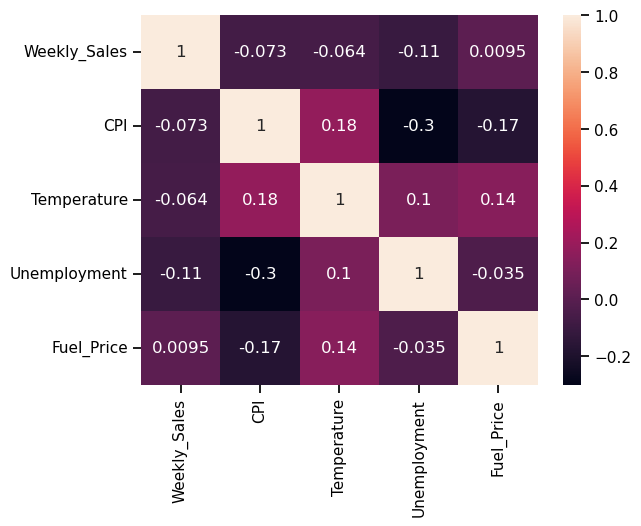

In [15]:
sns.heatmap(df[['Weekly_Sales', 'CPI', 'Temperature', 'Unemployment', 'Fuel_Price']].corr(), annot=True)
plt.show()

-------------------------------------------------------------------------------------------------------------------

# Variation of features over time

- This code essentially defines a function to create line plots for different features against time and then calls this function for specific features: Temperature, Fuel_Price, Unemployment, CPI, and Weekly_Sales. 

In [16]:
def relation_plot(feature_name):

    sns.lineplot(data=df,x=pd.to_datetime(df['Date']),y=feature_name)
    plt.xticks(rotation=90);
    plt.title(f'Relationship between {feature_name} and Time')

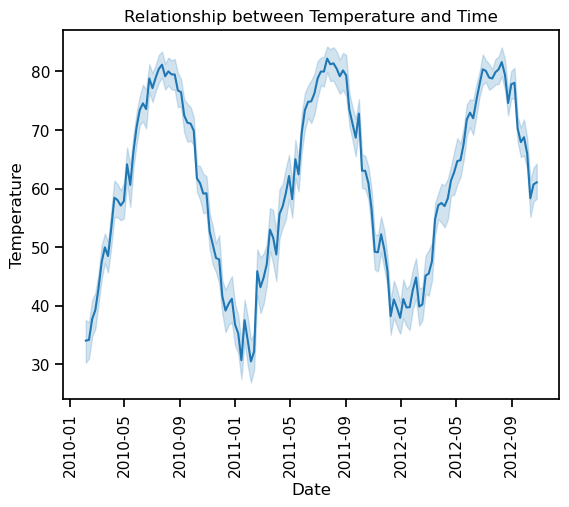

In [17]:
relation_plot('Temperature')

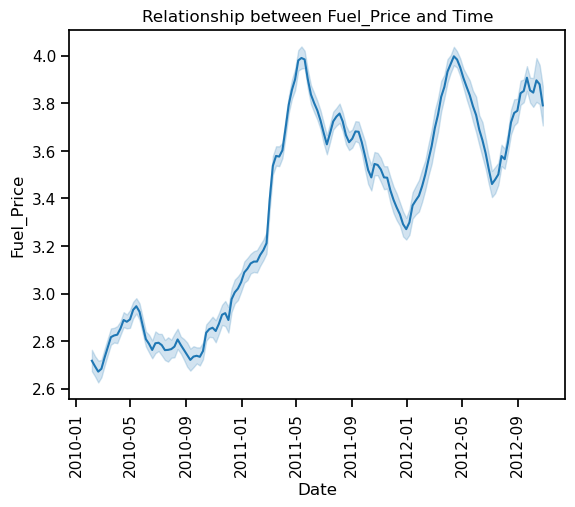

In [18]:
relation_plot('Fuel_Price')

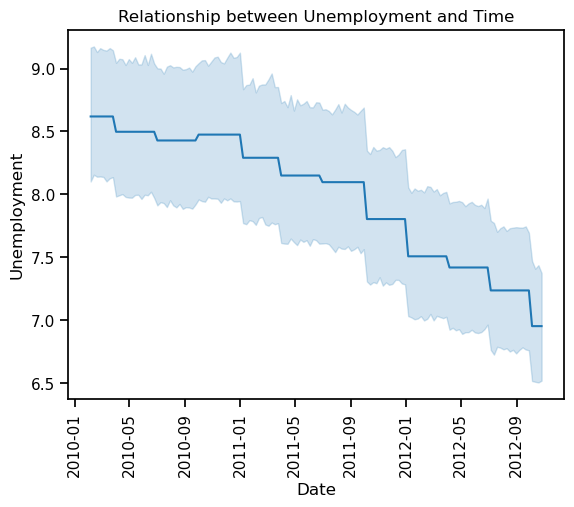

In [19]:
relation_plot('Unemployment')

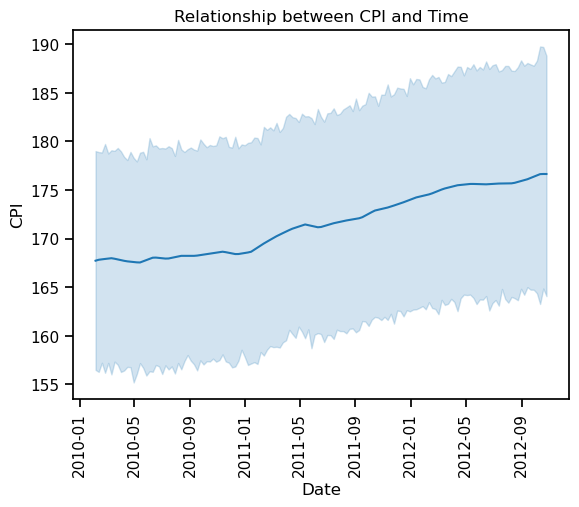

In [20]:
relation_plot('CPI')

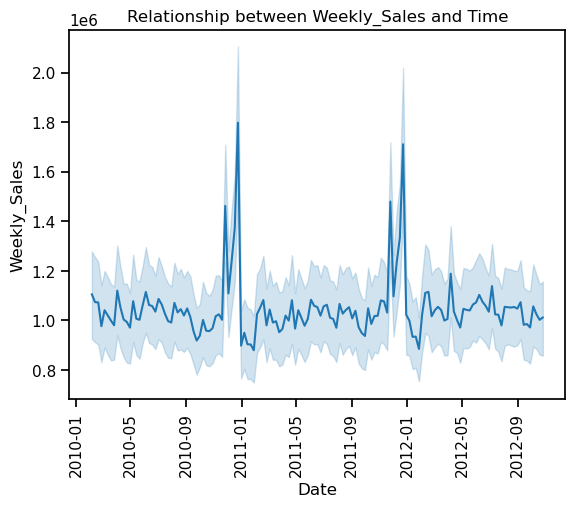

In [21]:
relation_plot('Weekly_Sales')

-------------------------------------------------------------------------------------------------------------------

# Average Weekly sales per store for all given years📊

- This code generates a bar plot to show the mean of weekly sales for each store. The stores are sorted in descending order based on their standard deviation values. The plot is customized for better readability and aesthetics using the specified figure size, color palette, and font sizes. The title, axis labels, and tick labels provide context and information about the content of the plot.

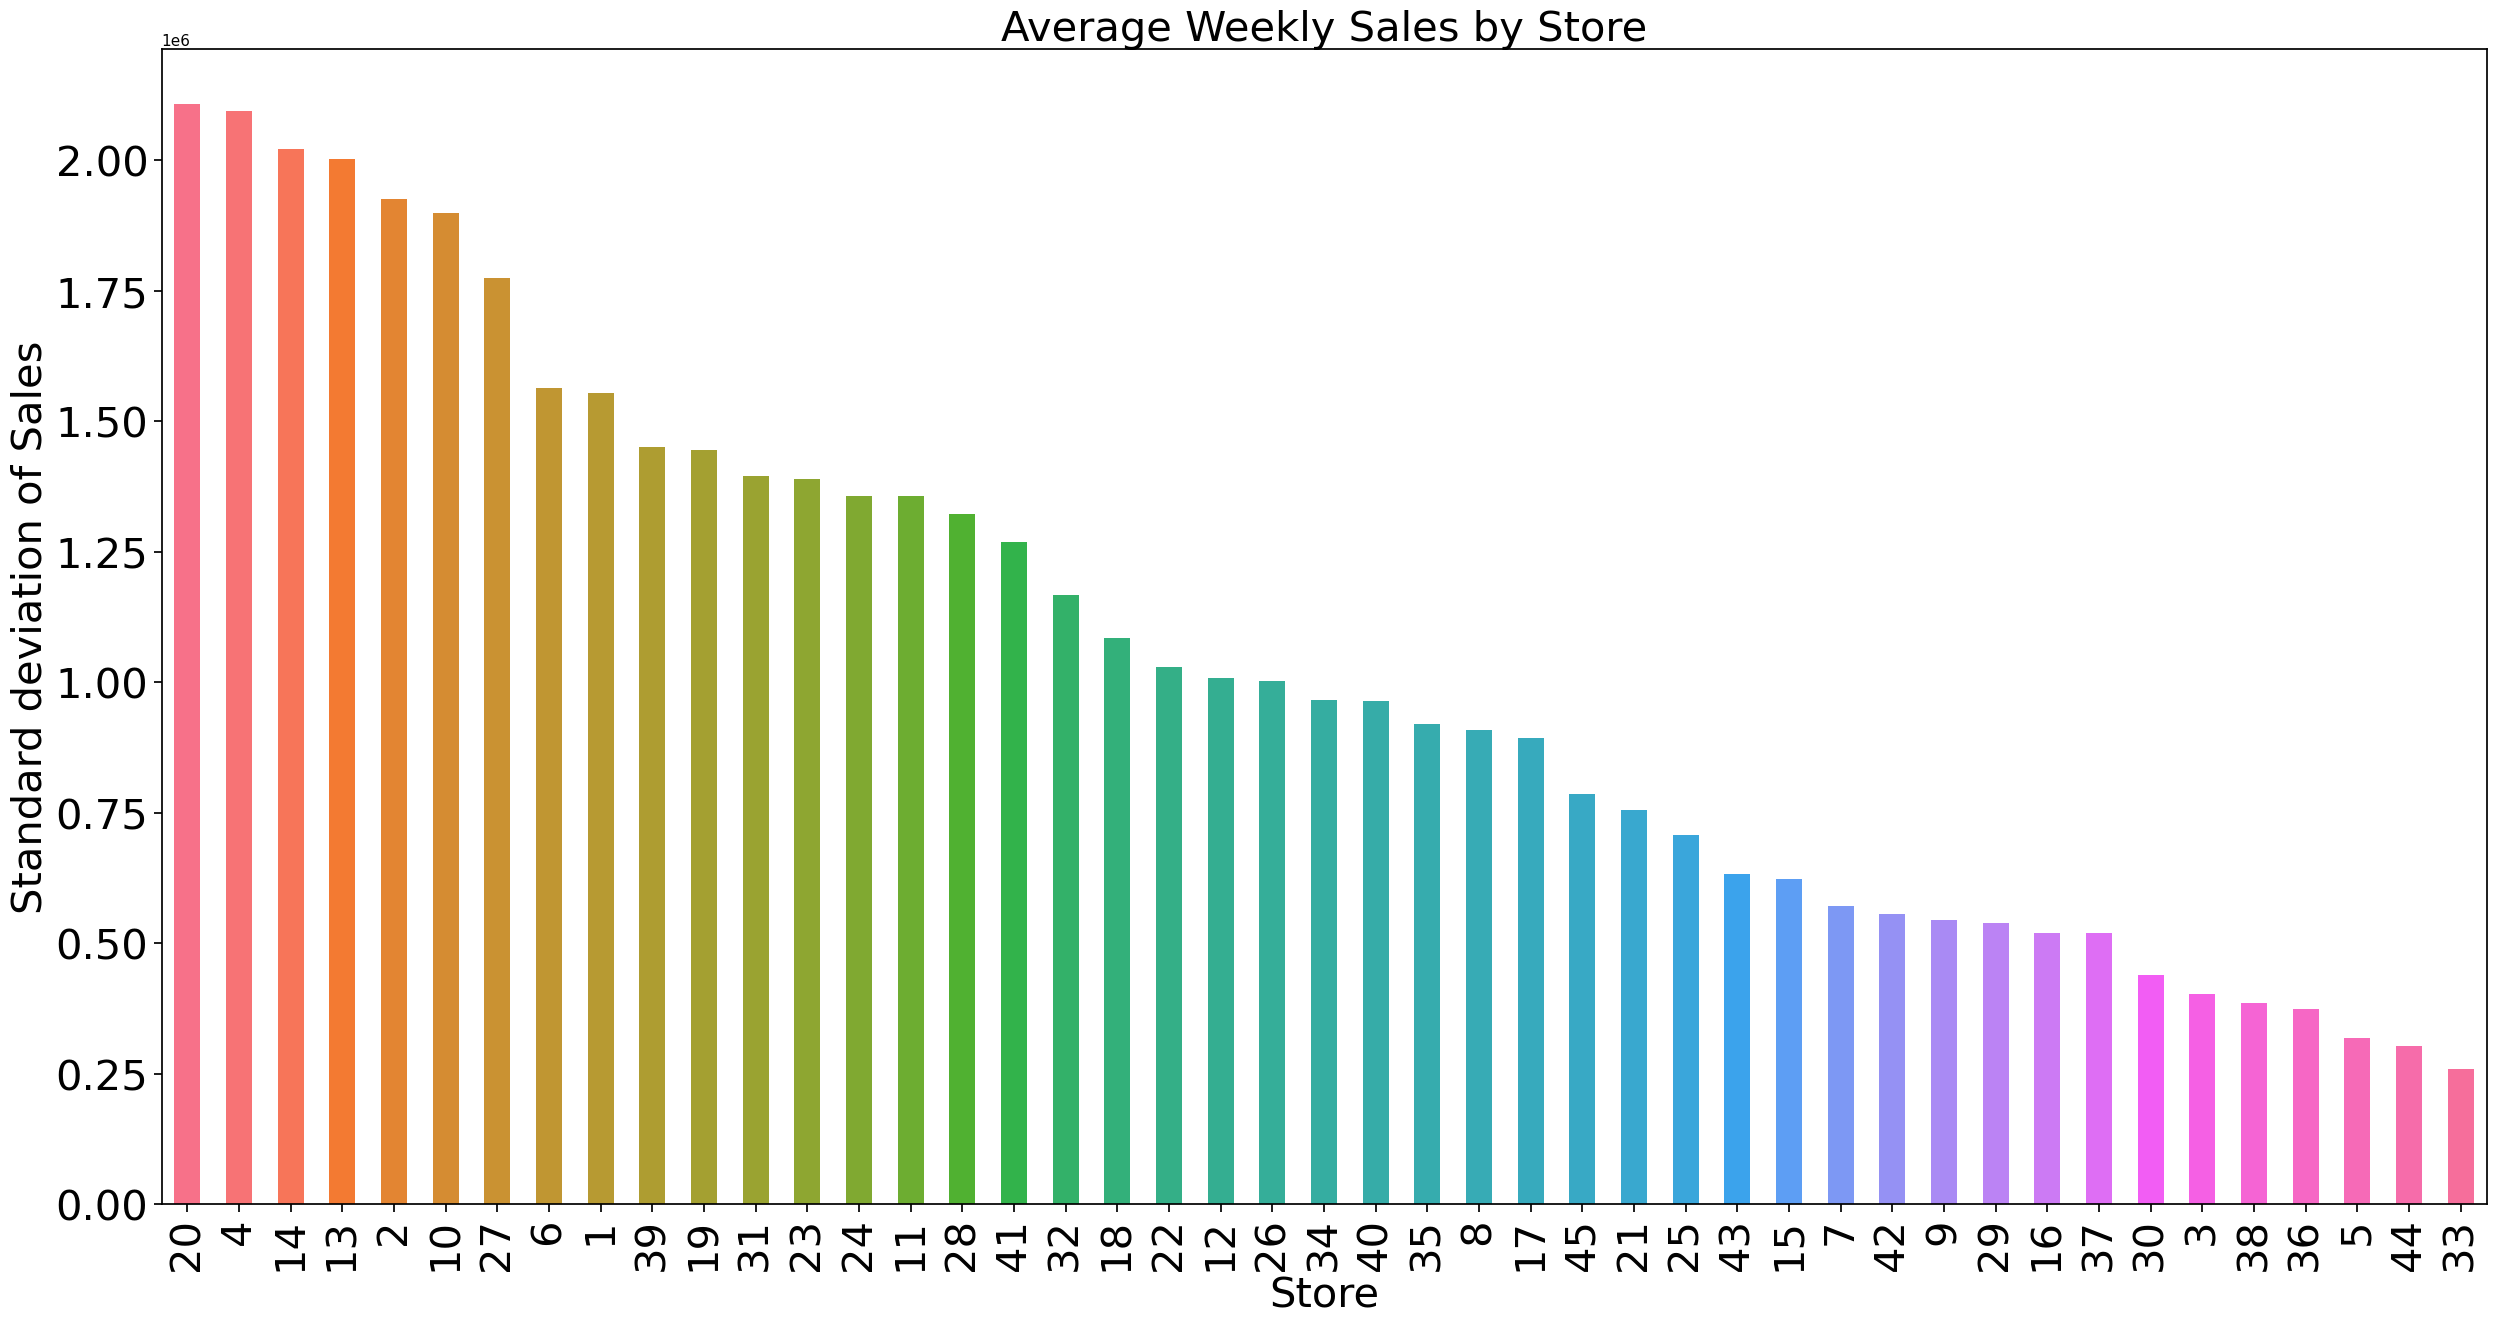

In [22]:
mean_weekly_sales_per_store = df.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(30,15))
mean_weekly_sales_per_store.plot(kind='bar', color=sns.color_palette("husl", 45))

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Average Weekly Sales by Store', fontsize=30)
plt.xlabel('Store', fontsize=30)
plt.ylabel('Standard deviation of Sales', fontsize=30)
plt.show()

-------------------------------------------------------------------------------------------------------------------

- The below code creates a bar plot to visualize the standard deviation of weekly sales for each store. The stores are sorted in ascending order based on their standard deviation values. The plot is customized for better readability and aesthetics using the specified figure size, color palette, and font sizes. The title, axis labels, and tick labels provide context and information about the content of the plot.

Text(0, 0.5, 'Standard deviation of Sales')

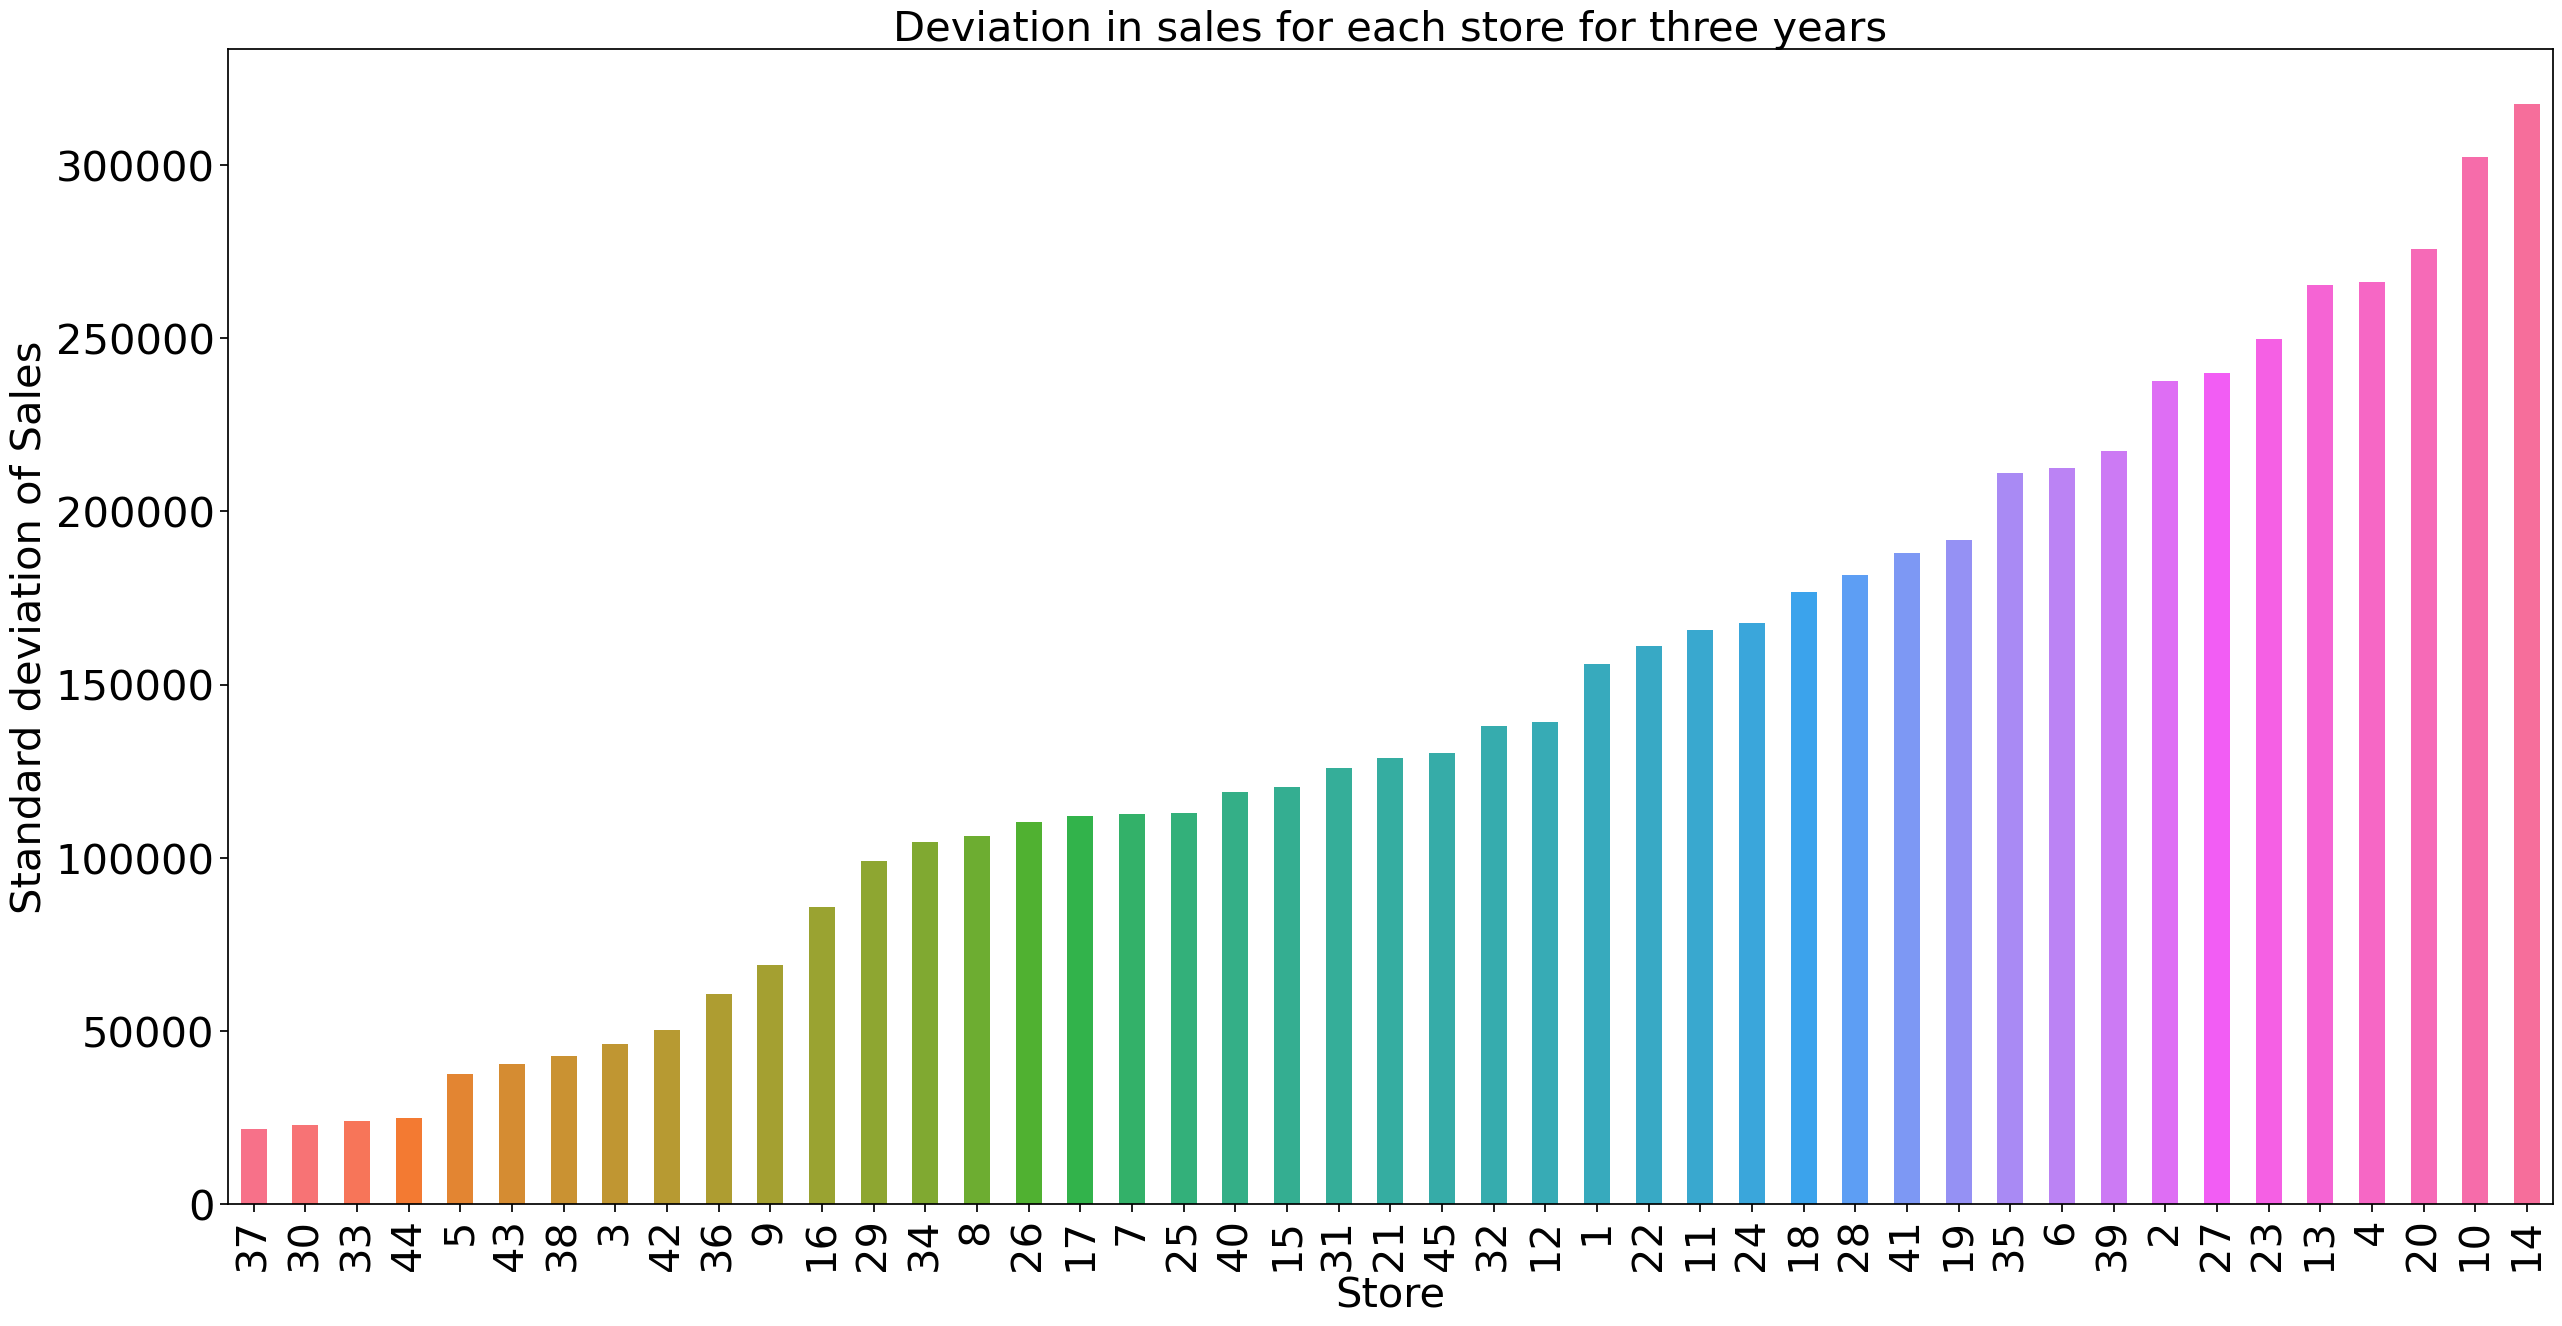

In [23]:
std_weekly_sales_per_store = df.groupby(['Store'])['Weekly_Sales'].std().sort_values()

plt.figure(figsize=(30,15))
std_weekly_sales_per_store.plot(kind='bar', color=sns.color_palette("husl", 45))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Deviation in sales for each store for three years', fontsize=30)
plt.xlabel('Store', fontsize=30)
plt.ylabel('Standard deviation of Sales', fontsize=30)

-------------------------------------------------------------------------------------------------------------------

# 💲ales by Year

In [24]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] =df['Date'].dt.isocalendar().week

- The code generates a bar plot using Seaborn to show the total weekly sales for each year. Text annotations are added above each bar to display the exact sales values. The plot is customized with labels and a title for better interpretation.

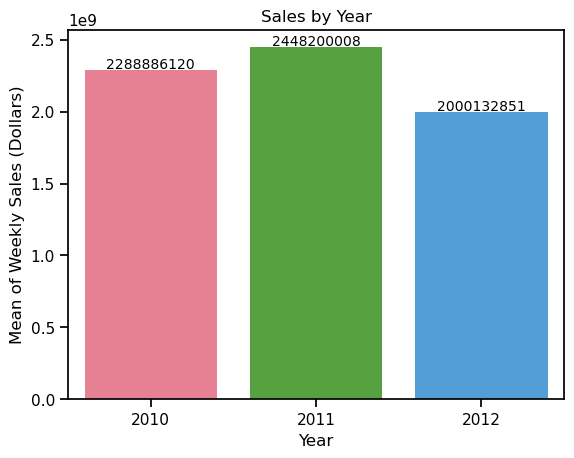

In [25]:
year = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
g = sns.barplot(data=year,x='Year',y='Weekly_Sales', palette=sns.color_palette("husl", 3))
for v in year.itertuples():
    g.text(x=v.Index,y=v.Weekly_Sales+1e7,s=str(v.Weekly_Sales), size=10, ha="center")
plt.xlabel('Year')
plt.ylabel('Mean of Weekly Sales (Dollars)')
plt.title("Sales by Year")
plt.show()

-------------------------------------------------------------------------------------------------------------------

- The following code generates a Seaborn bar plot to compare the mean weekly sales for different store types. The bars represent the mean values, and error bars indicating the confidence interval are included. The plot is customized with labels and a title for better interpretation

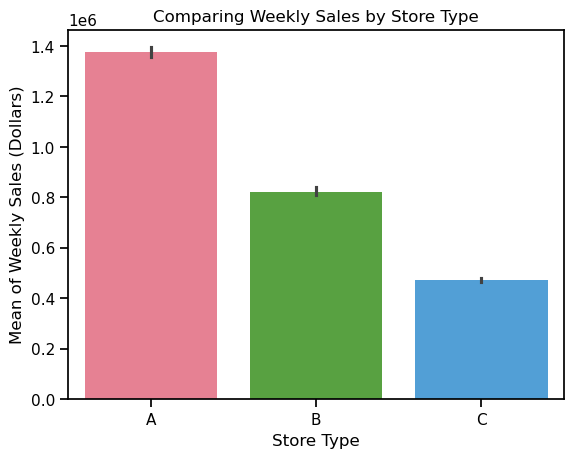

In [26]:
sns.barplot(data=df,x='Type',y='Weekly_Sales',palette=sns.color_palette("husl", 3),estimator=np.mean,errorbar='ci')

plt.xlabel('Store Type')
plt.ylabel('Mean of Weekly Sales (Dollars)')
plt.title("Comparing Weekly Sales by Store Type")
plt.show()

-------------------------------------------------------------------------------------------------------------------

- The below code transforms the original DataFrame into a pivot table where each row represents a month, each column represents a year, and the values are the aggregated weekly sales. The line plot of this pivot table visualizes the trend of monthly sales over the years.

<Axes: xlabel='Month'>

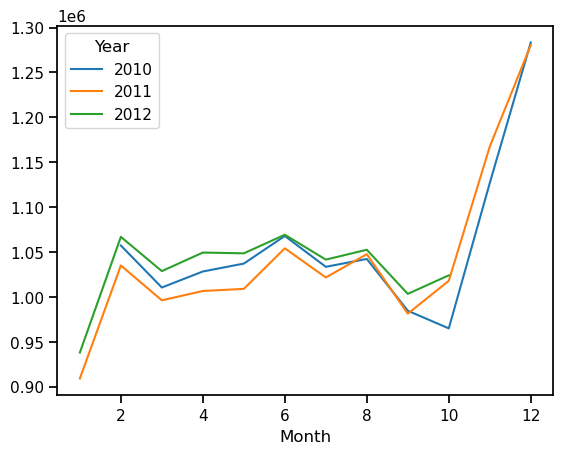

In [27]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

-------------------------------------------------------------------------------------------------------------------

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

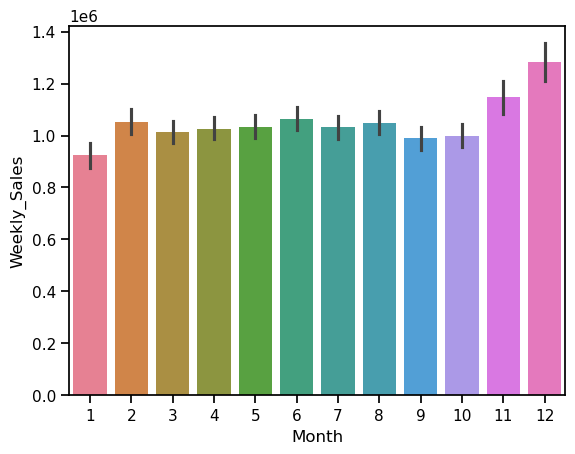

In [28]:
sns.barplot(x='Month', y='Weekly_Sales', data=df, palette=sns.color_palette("husl", 12))

- The resulting bar plot visually represents how the average weekly sales vary across different months. It allows for a quick comparison of sales performance between months. The color palette adds visual distinction to the bars, making it easier to differentiate between them.

-------------------------------------------------------------------------------------------------------------------

- This code sets up a larger figure size using Matplotlib and then creates a Seaborn bar plot to visualize the weekly sales trends from the provided DataFrame (df). The larger figure size is specified to ensure that the resulting plot is visually clear and accommodating for the chosen data.

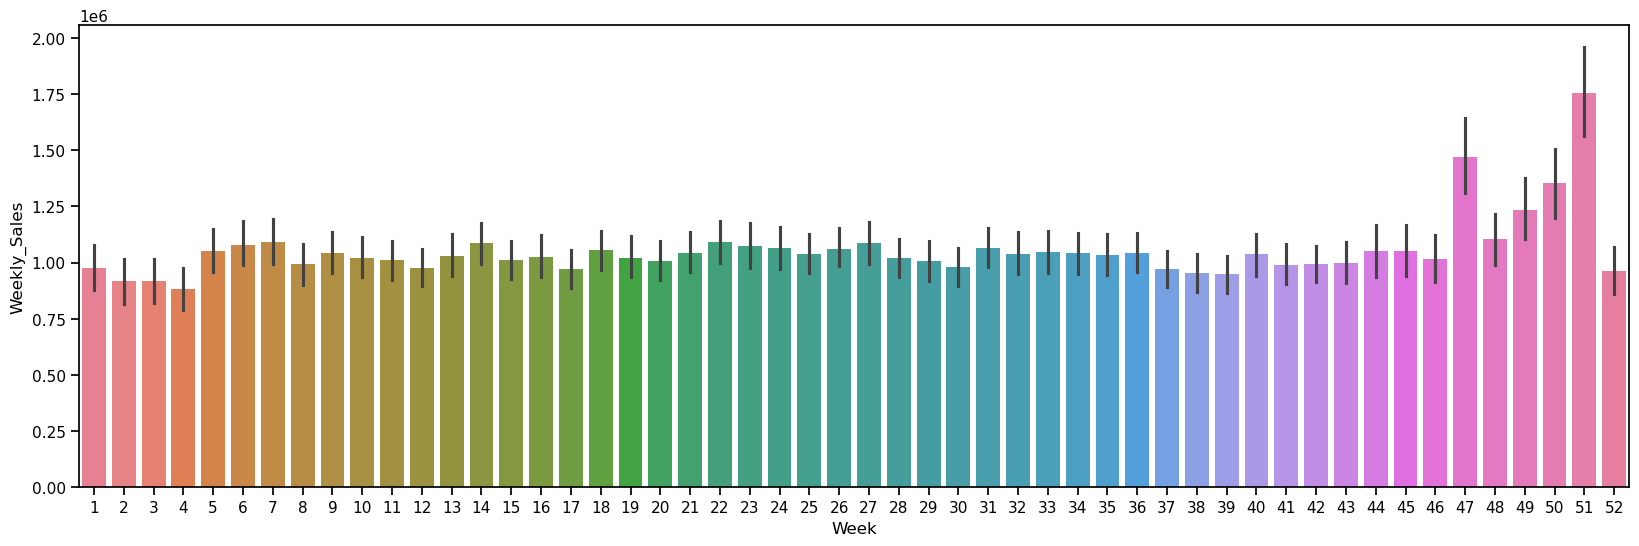

In [29]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=df, palette=sns.color_palette("husl", 52))

-------------------------------------------------------------------------------------------------------------------

- The code calculates the correlation between weekly sales and other attributes for each store, storing the results in a new DataFrame (store_df_corr). The resulting DataFrame provides insights into how the weekly sales correlate with the specified attributes for each store.

In [30]:
# Calculate the correlation of each store with CPI, Unemployment, Fuel_Price and Temperature
store_df_corr = pd.DataFrame(columns= ['Store','Weekly_Sales','Temperature',
                                        'Fuel_Price','CPI','Unemployment'])

df_new = df[['Store','Weekly_Sales','Temperature', 'Fuel_Price','CPI','Unemployment']]

for store_num in df['Store'].unique():
    store_df = df_new[df_new['Store'] == store_num]
    
    # calculate the correlation of each store weekly sales with all attributes
    store_df_corr.loc['store_weekly_sales_' + str(store_num)] = store_df.corr()['Weekly_Sales'].to_list()


store_df_corr = store_df_corr.drop(['Weekly_Sales', 'Store'], axis = 1)
store_df_corr.head()

,Temperature,Fuel_Price,CPI,Unemployment
store_weekly_sales_1,-0.222701,0.124592,0.225408,-0.097955
store_weekly_sales_2,-0.297673,-0.196375,-0.062431,0.066325
store_weekly_sales_3,-0.377524,0.140887,0.317250,-0.230413
store_weekly_sales_4,-0.225582,0.211549,0.351157,-0.337015
store_weekly_sales_5,-0.175517,0.167353,0.308261,-0.207043


-------------------------------------------------------------------------------------------------------------------

- This function is designed to analyze correlations for a specific column (col_name) in a DataFrame (store_df_corr). It separates positive and negative correlations, sorts the results, and returns two DataFrames along with the associated store numbers. The type annotations provide clarity about the expected types of input and return values.

In [31]:
def get_positive_negative_corr(col_name:str)->(pd.DataFrame, pd.DataFrame):
    pos_corr = store_df_corr[store_df_corr[col_name] > 0].sort_values(by = col_name, ascending = False)
    pos_corr_store = [ int(i[3]) for i in pos_corr.index.str.split("_")]
    
    neg_corr = store_df_corr[store_df_corr[col_name] < 0].sort_values(by = col_name,ascending = True)
    neg_corr_store = [ int(i[3]) for i in neg_corr.index.str.split("_")]

    return pos_corr, neg_corr

- This function creates a bar plot to visually represent the impact of a specified column on store weekly sales. The positive and negative correlations are shown in different colors, and the plot is customized for better interpretation.

In [32]:
def plot_positive_negative_corr(pos_corr_df:pd.DataFrame, neg_corr_df:pd.DataFrame, col_name:str) ->None:
    plt.figure(figsize = (24,8))
    pos_corr_df = pos_corr_df.sort_values(by = col_name, ascending = True)
    corr_all = pd.concat([neg_corr_df, pos_corr_df], axis = 0)
    ax = sns.barplot(x = corr_all.index, y = corr_all[col_name], palette=sns.color_palette("husl", 5))
    
    plt.title(f"Impact of {col_name} on Store's Weekly Sales", va = 'top', fontsize = 15)
    plt.xticks(rotation = 67, fontsize = 15)
    plt.xlabel("Store Number", fontsize = 15)
    plt.ylabel(f"Correlation between Weekly Sales and col_name", fontsize = 15)

- This code calculates positive and negative correlations for the 'Unemployment' attribute using the get_positive_negative_corr function and then visualizes the results using the plot_positive_negative_corr function. The resulting bar plot helps understand how changes in unemployment correlate with store weekly sales for different stores. Positive correlations indicate a positive relationship, while negative correlations indicate a negative relationship between unemployment and weekly sales.

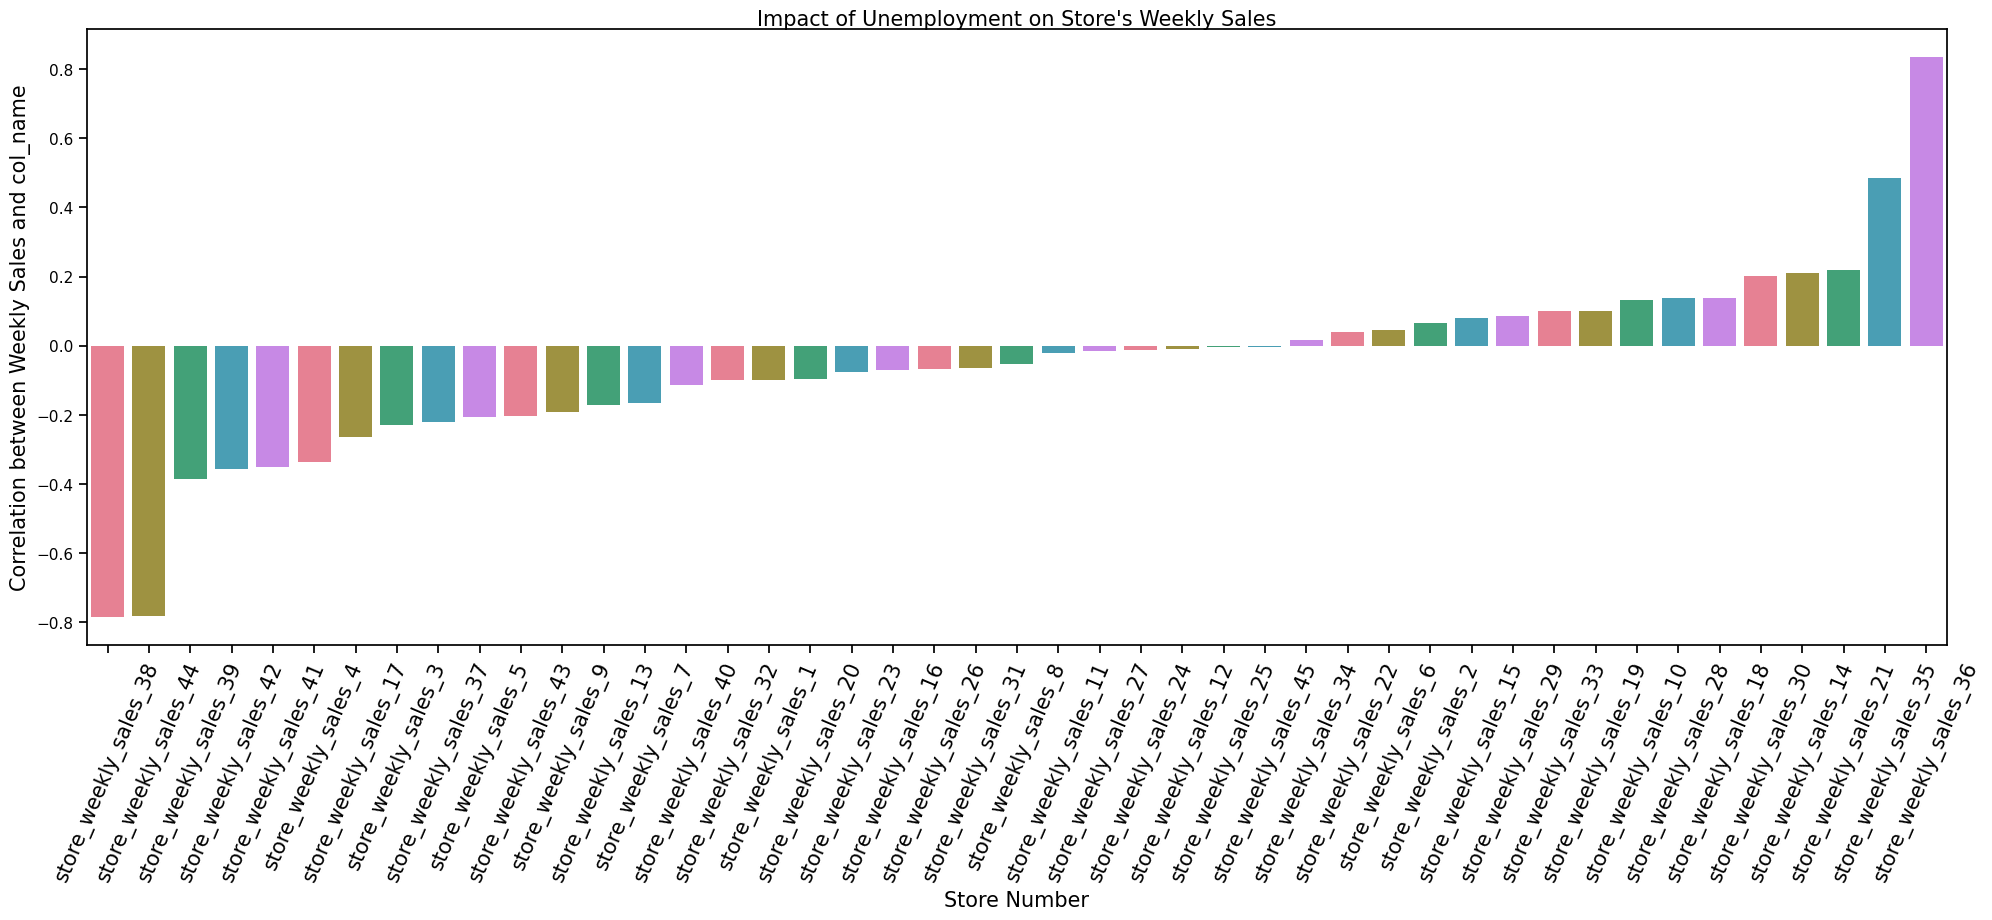

In [33]:
pos_corr_unemployment, neg_corr_unemployment = get_positive_negative_corr('Unemployment')
plot_positive_negative_corr(pos_corr_unemployment, neg_corr_unemployment, 'Unemployment') 

-------------------------------------------------------------------------------------------------------------------

- This code calculates positive and negative correlations for the 'Temperature' attribute using the get_positive_negative_corr function and then visualizes the results using the plot_positive_negative_corr function. The resulting bar plot helps understand how changes in temperature correlate with store weekly sales for different stores. Positive correlations indicate a positive relationship, while negative correlations indicate a negative relationship between temperature and weekly sales.

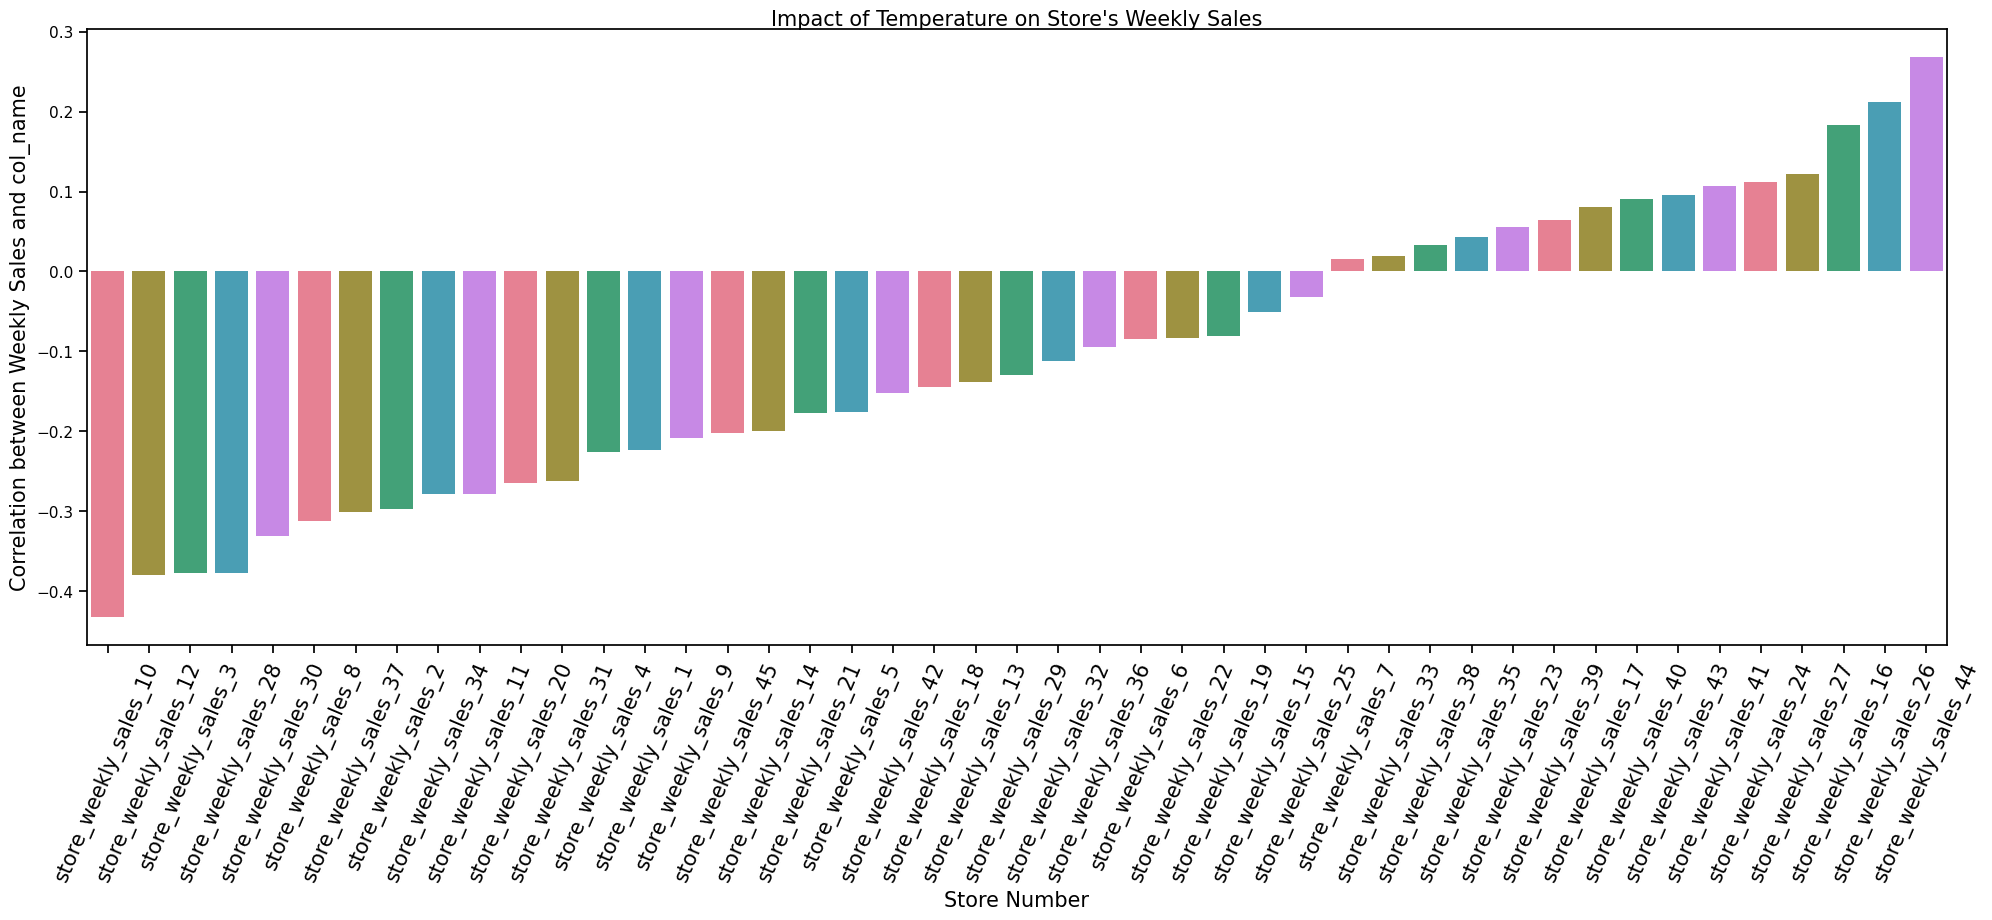

In [34]:
pos_corr_temp, neg_corr_temp = get_positive_negative_corr('Temperature')
plot_positive_negative_corr(pos_corr_temp, neg_corr_temp, 'Temperature') 

-------------------------------------------------------------------------------------------------------------------

- This code calculates positive and negative correlations for the 'CPI' attribute using the get_positive_negative_corr function and then visualizes the results using the plot_positive_negative_corr function. The resulting bar plot helps understand how changes in the Consumer Price Index correlate with store weekly sales for different stores. Positive correlations indicate a positive relationship, while negative correlations indicate a negative relationship between CPI and weekly sales.

In [ ]:
pos_corr_cpi, neg_corr_cpi = get_positive_negative_corr('CPI')
plot_positive_negative_corr(pos_corr_cpi, neg_corr_cpi, 'CPI') 

-------------------------------------------------------------------------------------------------------------------

- This code generates a bar plot to visualize the total sales for each store, with the stores ordered by total sales in descending order. Additionally, it prints the store numbers of the top and worst performing stores based on historical data.

In [ ]:
grouped_stores = df.groupby('Store').agg(total_sales = ('Weekly_Sales','sum'),
                                            avg_sales = ('Weekly_Sales','mean')).sort_values(by = 'total_sales', ascending=False)
plt.figure(figsize = (20,12))
# order is not specified, then barplot arranges the xlabels in ascending order if they are of int type
ax = sns.barplot(x= grouped_stores.index, y = grouped_stores['total_sales'], order = grouped_stores.index)

plt.xticks(rotation = 90, fontsize = 20)

print("Top 5 performing stores according to the historical data provided are:", grouped_stores.index.to_list()[:5])
print("The Worst 5 performing stores according to the historical data provided are:", grouped_stores.index.to_list()[-5:] )


-------------------------------------------------------------------------------------------------------------------

- The below code generates a pie chart to visually represent the revenue proportion of different store types. Each slice represents a store type, and the size of each slice corresponds to the proportion of its weekly sales relative to the total weekly sales. The explode effect is used to visually separate the 'Type A' slice.

In [ ]:
import matplotlib.pyplot as plt

# Store Types list
labels = ['Type A', 'Type B', 'Type C']
explode = (0.1, 0, 0)

proportion = [df[df['Type'] == store_type]['Weekly_Sales'].sum()/df['Weekly_Sales'].sum() * 100 for store_type in df['Type'].unique()]

# Creating the pie chart
plt.pie(proportion, labels=labels, autopct='%1.1f%%', startangle=45, shadow=True, explode=explode)
plt.axis('equal')  
plt.title('Revenue Proportion')

plt.show()


-------------------------------------------------------------------------------------------------------------------

- The below code encapsulates the process of creating a line plot to visualize weekly sales with marked holiday dates, and it specifically demonstrates this with Black Friday dates. The function provides a modular and reusable way to explore sales patterns in relation to specific events.


In [ ]:
# finding out visually by plotting sales plot

def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

Black_Friday = ['26-11-2010', '25-11-2011']
    
plot_line(total_sales,Black_Friday,'Black Friday Period')

-------------------------------------------------------------------------------------------------------------------

## Plotting Histogram of Weekly Sales

In [ ]:
sns.histplot(data = df, x='Weekly_Sales', kde=True, bins=15)
plt.show()

- The resulting histogram provides a visual representation of the distribution of weekly sales. The x-axis represents the range of weekly sales values, and the y-axis represents the frequency or count of occurrences within each bin. The KDE plot overlaid on the histogram provides a smooth estimation of the probability density function. This visualization helps in understanding the central tendency and spread of the 'Weekly_Sales' data, as well as identifying potential patterns or outliers in the distribution.

In [ ]:
def plot_histogram(data, shape, scale):

    # Calculate the PDF (Probability Density Function) for the Gamma distribution
    x = np.linspace(min(df['Weekly_Sales']), max(df['Weekly_Sales']), len(df['Weekly_Sales']))
    pdf = stats.gamma.pdf(x, shape, scale=scale)

    # Plotting the histogram of generated data and the PDF of Gamma distribution
    plt.figure(figsize=(8, 6))

    # Histogram of generated data
    plt.hist(data, bins=30, density=True, alpha=0.5, label='Generated Data')
    plt.hist(df['Weekly_Sales'], bins=20, density=True, alpha=0.5, label='Actual Data')

    # Plot the PDF of Gamma distribution
    plt.plot(x, pdf, 'r-', lw=2, label='Gamma PDF')

    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.title(f'Gamma Distribution with Alpha: {shape:.2f}, Beta: {scale:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

- Here first we find the Gamma Distribution parameters by Frequentist statistics

In [ ]:
mean_value = df['Weekly_Sales'].mean()
std_dev = df['Weekly_Sales'].std()

# Parameters for the Gamma distribution
shape = (mean_value / std_dev)**2 # Shape parameter (α)
scale = std_dev**2 / mean_value  # Scale parameter (β)

print(f'(apha, beta) = {shape, scale}')

In [ ]:
data = stats.gamma.rvs(shape, scale=scale, size=1000)

plot_histogram(data, shape, scale)

- Secondly, find the Gamma Distribution parameters by Bayesian statistics 

In [ ]:
# Sample data (replace this with your own data)
data = df['Weekly_Sales']  # Example data from a Gamma distribution

# Define PyMC model
with pm.Model() as gamma_model:
    # Prior distributions for Gamma parameters
    alpha = pm.HalfNormal('alpha', sigma=10)
    beta = pm.HalfNormal('beta', sigma=10)
    
    # Likelihood of observed data
    likelihood = pm.Gamma('likelihood', alpha=alpha, beta=beta, observed=data)
    
    step = pm.Metropolis()
    
    # Sampling
    trace = pm.sample(1000, step=step, tune=1000)

# Plotting posterior distributions
pm.plot_posterior(trace, var_names=['alpha', 'beta'], figsize=(10, 6))
plt.show()


In [ ]:
with gamma_model:
    posterior_pred = pm.sample_posterior_predictive(trace)

posterior_likelihood = np.array(posterior_pred.posterior_predictive['likelihood']).flatten()

In [ ]:
plot_histogram(posterior_likelihood, np.array(trace.posterior['alpha']).mean(), \
               np.array(trace.posterior['beta']).mean())

- The resulting plot provides a visual comparison between the histogram of the generated data, the histogram of the actual data, and the Probability Density Function of the Gamma distribution. This type of visualization is helpful for assessing how well the generated data matches the characteristics of the actual data and understanding the distribution of the data.

-------------------------------------------------------------------------------------------------------------------

In [ ]:
total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

start_date = '2010-06-01'
end_date = '2011-06-30'

# Filter records between the given date range
total_sales = total_sales[(total_sales['Date'] >= start_date) & (total_sales['Date'] <= end_date)]


plt.figure(figsize=(30,15))

plt.bar(total_sales["Date"], total_sales["Weekly_Sales"], color="#348ABD", width=5)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Total sales per Week', fontsize=30)
plt.xlabel('Week', fontsize=30)
plt.ylabel('Total Sales', fontsize=30)
plt.xticks(rotation=90)
plt.show()

- The resulting bar plot visually represents the total sales per week within the specified date range, providing insights into the sales trend over time.

-------------------------------------------------------------------------------------------------------------------

In [ ]:
total_sales.head()

In [ ]:
with pm.Model() as model:
    alpha = 1.0/total_sales["Weekly_Sales"].mean()
    
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=len(total_sales["Weekly_Sales"]) - 1)

In [ ]:
with model:
    idx = np.arange(len(total_sales["Weekly_Sales"])) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [ ]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=total_sales["Weekly_Sales"])

- The below code snippet demonstrates the setup of a Bayesian model, the creation of a Metropolis step method, and the execution of the Metropolis-Hastings algorithm to obtain samples from the posterior distribution of the model parameters. The samples in the trace variable can be further analyzed for Bayesian inference and model diagnostics.

In [ ]:
### Metropolis-Hastings simulation
with model:
    step = pm.Metropolis()
    trace = pm.sample(4000, tune=1000, step=step, cores = 1)
    
# model.debug

-------------------------------------------------------------------------------------------------------------------

- After running the below code, you would have three arrays (lambda_1_samples, lambda_2_samples, and tau_samples), each containing the flattened samples from the posterior distribution of the corresponding model parameter. These samples can be used for further analysis, such as computing summary statistics, plotting posterior distributions, or making inferences about the model parameters.

In [ ]:
lambda_1_samples = np.array(trace.posterior['lambda_1']).flatten()
lambda_2_samples = np.array(trace.posterior['lambda_2']).flatten()
tau_samples = np.array(trace.posterior['tau']).flatten()

lambda_1_samples

In [ ]:
plt.figure(figsize=(12.5, 10))

#histogram of the samples:

ax = plt.subplot(311)

plt.hist(lambda_1_samples
         , histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$",color="#A60628")
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6")
plt.legend(loc="upper left")
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=len(total_sales["Weekly_Sales"]), alpha=1,
         label=r"posterior of $\tau$", color="#467821",
          weights=w, rwidth=2.)

plt.legend(loc="upper left")
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

- Overall, these subplots are part of the same figure and provide a visual representation of the posterior distributions of the three variables. The legend in each subplot explains what each histogram represents.

-------------------------------------------------------------------------------------------------------------------

In [ ]:
total_sales.iloc[22]["Date"]

In [ ]:
total_sales.iloc[30]["Date"]

-------------------------------------------------------------------------------------------------------------------

In [ ]:
plt.figure(figsize=(12.5, 5))

N = tau_samples.shape[0]
expected_poles_per_day = np.zeros(len(total_sales))
for day in range(0, len(total_sales)):
    ix = day < tau_samples

    expected_poles_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(total_sales["Date"], expected_poles_per_day, lw=4, color="#E24A33",
         label=("Total Weekly Sales"))

plt.xlabel("Day")
plt.ylabel("Total Weekly Sales")
plt.title("Expected amount of sales recorded in 2011 to 2012")

plt.bar(total_sales["Date"], total_sales['Weekly_Sales'], color="#348ABD", alpha=0.65, width = 5,
        label="observed poles per week")

plt.legend(loc="upper left");

- The resulting plot visually compares the expected amount of sales over time based on Bayesian inference with the observed weekly sales recorded in the dataset. The change point (tau) influences the expected sales values in the plot.

-------------------------------------------------------------------------------------------------------------------

# A/B testing:

In [ ]:
sales_data_2010 = np.array(df[df['Date'].dt.year == 2010]["Weekly_Sales"])
sales_data_2011 = np.array(df[df['Date'].dt.year == 2011]["Weekly_Sales"])
sales_data_2012 = np.array(df[df['Date'].dt.year == 2012]["Weekly_Sales"])
sales_data_2013 = np.array(df[df['Date'].dt.year == 2013]["Weekly_Sales"])

print(len(sales_data_2010), len(sales_data_2011),len(sales_data_2012), len(sales_data_2013))

- Typically, in hypothesis testing, you compare the p-value to a significance level (commonly 0.05) to determine whether to reject the null hypothesis. If the p-value is less than or equal to the significance level, you reject the null hypothesis, suggesting that there is a significant difference between the means of the two groups. If the p-value is greater than the significance level, you fail to reject the null hypothesis.

In [ ]:
stats.ttest_ind(a = sales_data_2010, b = sales_data_2011, equal_var = False)

In [ ]:
stats.ttest_ind(a = sales_data_2011, b = sales_data_2012, equal_var = False)

In [ ]:
sales_data_type_A_store = np.array(df[df['Type'] == 'A']["Weekly_Sales"])
sales_data_type_B_store = np.array(df[df['Type'] == 'B']["Weekly_Sales"])
sales_data_type_C_store = np.array(df[df['Type'] == 'C']["Weekly_Sales"])

sales_data_type_A_store

In [ ]:
stats.ttest_ind(a = sales_data_type_A_store, b = sales_data_type_B_store, equal_var = False)

In [ ]:
stats.ttest_ind(a = sales_data_type_B_store, b = sales_data_type_C_store, equal_var = False)

- A/B testing between Store Types demonstrated a significant difference in sales data. The resulting p-value was substantially lower, providing ample evidence to reject the null hypothesis and affirm that weekly sales data differ significantly among the store types.

## Conclusion:

1. Store 20 emerged as the leader in revenue generation, surpassing all other stores.

2. Weekly sales for store 37 exhibited minimal fluctuations over time, indicating a stable performance.

3. In 2011, Walmart achieved the highest weekly sales, marking a notable milestone in its performance.

4. Store Type A attained the highest weekly sales, outperforming Types B and C.

5. There was a substantial increase in weekly sales towards the end of each year, highlighting a significant upward trend.

6. Stores 38 and 36 exerted a considerable impact on unemployment and Consumer Price Index (CPI) values.

7. The temperature had a pronounced effect on the sales of stores 10 and 44.

8. According to historical data, the top-performing stores, in descending order, are: 20, 4, 14, 13, and 2.

9. Conversely, the five weakest-performing stores, based on historical data, are: 38, 36, 5, 44, and 33.

10. Store Type A consistently recorded the highest weekly sales, followed by Types B and C.

11. Analyzing sales trends between '2010-06-01' and '2011-06-30' revealed a noticeable shift during a specific time period.

12. Conducting a Student T-Test between 2010-2011 and 2011-2012 yielded a p-value higher than the industry-standard significance level. Therefore, the null hypothesis cannot be rejected, indicating no significant difference in weekly sales between these years.

13. Similarly, A/B testing between Store Types demonstrated a significant difference in sales data. The resulting p-value was substantially lower, providing ample evidence to reject the null hypothesis and affirm that weekly sales data differ significantly among the store types.

## References:

- Data Source: https://data.world/tommywilczek/walmart
- https://en.wikipedia.org/wiki/Consumer_price_index
- https://www.kaggle.com/code/suraj520/sklearn-descriptive-analysis-on-walmart-retail#kln-56
- https://www.kaggle.com/datasets/adityasingh2211/walmart-customer-purchase-behavior-study

<br />
<center>
<img src="images/sam_walton_quote.jpeg" width=700 />
</center>